# Multi-Class Prediction of Obesity Risk

**Programa de Engenharia de Sistemas e Computação**

**CPS833 - Data Mining**

**Professor**: Geraldo Zimbrão da Silva

**Aluno**: Luiz Henrique Souza Caldas

## Importação de bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Pré-processamento

In [3]:
# Importação dos dados
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

# Verificação de dados ausentes (limpeza de dados)
print(f"{train_dataset.isnull().any().sum()} dados faltantes no dataset de treino")
print(f"{train_dataset.isnull().any().sum()} dados faltantes no dataset de teste")

# Verificação de linhas duplicadas (redução de dimensionalidade)
print(f"{train_dataset.duplicated().sum()} linhas duplicadas no dataset de treino")
print(f"{train_dataset.duplicated().sum()} linhas duplicadas no dataset de teste")

# TODO Verificação de ouliers (redução de dimensionalidade)

# Codificando features categóricas com Label Encoder (transformação de dados)
label_encoder = LabelEncoder()

train_dataset_encoded = train_dataset.copy()  # Faz uma cópia do dataset de treino para evitar alterações no original
for col in train_dataset.columns:
    if train_dataset[col].dtype == 'object':  # Verifica se a coluna é categórica
        train_dataset_encoded[col] = label_encoder.fit_transform(train_dataset[col])

test_dataset_encoded = test_dataset.copy() # Faz uma cópia do dataset de teste para evitar alterações no original
for col in test_dataset.columns:
    if test_dataset[col].dtype == 'object':  # Verifica se a coluna é categórica
        test_dataset_encoded[col] = label_encoder.fit_transform(test_dataset[col])

# Separação entre features e labels no dataset de treinamento e remoção da coluna id nos dois datasets
features = train_dataset_encoded.iloc[:,1:17].values # features do dataset de treino removendo o id
labels = train_dataset_encoded.iloc[:,17].values # labels
test = test_dataset_encoded.drop(columns=['id']) # removendo o id do dataset de teste

# Escalonando os dados (transformação de dados)
scaler = StandardScaler()
features = scaler.fit_transform(features)
test = scaler.fit_transform(test)

0 dados faltantes no dataset de treino
0 dados faltantes no dataset de teste
0 linhas duplicadas no dataset de treino
0 linhas duplicadas no dataset de teste


## Seleção de Modelo
### Escolha da técnica

In [6]:
resultados_naive_bayes = []
resultados_logistica = []
resultados_forest = []
resultados_knn = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    naive_bayes = GaussianNB() # criação do modelo Naive Bayes
    scores = cross_val_score(naive_bayes, features, labels, cv=kfold) # validação cruzada do modelo Naive Bayes
    resultados_naive_bayes.append(scores.mean()) # avaliação do modelo Naive Bayes
    
    logistica = LogisticRegression(max_iter=500) # criação do modelo de Regressão Logística
    scores = cross_val_score(logistica, features, labels, cv=kfold) # treinamento do modelo de Regressão Logística
    resultados_logistica.append(scores.mean()) # avaliação do modelo de Regressão Logística

    random_forest = RandomForestClassifier(n_jobs=-1, random_state=i) # criação do modelo de Random Forest
    scores = cross_val_score(random_forest, features, labels, cv=kfold) # treinamento do modelo de Random Forest
    resultados_forest.append(scores.mean()) # avaliação do modelo de Random Forest

    knn = KNeighborsClassifier() # criação do modelo de k-NN 
    scores = cross_val_score(knn, features, labels, cv=kfold) # treinamento do modelo de k-NN 
    resultados_knn.append(scores.mean()) # avaliação do modelo de k-NN 

    svm = SVC() # criação do modelo de SVM
    scores = cross_val_score(svm, features, labels, cv=kfold) # treinamento do modelo de SVM
    resultados_svm.append(scores.mean()) # avaliação do modelo de SVM

    rede_neural = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, activation='relu', solver='adam', random_state=i) # criação do modelo de Rede Neural
    scores = cross_val_score(rede_neural, features, labels, cv=kfold) # treinamento do modelo de Rede Neural
    resultados_rede_neural.append(scores.mean()) # avaliação do modelo de Rede Neural

In [4]:
print(f"Naïve Bayes com média {np.mean(resultados_naive_bayes)} e desvio padrão {np.std(resultados_naive_bayes)}")
print(f"Regressão Logística com média {np.mean(resultados_logistica)} e desvio padrão {np.std(resultados_logistica)}")
print(f"Random Forest com média {np.mean(resultados_forest)} e desvio padrão {np.std(resultados_forest)}")
print(f"k-NN com média {np.mean(resultados_knn)} e desvio padrão {np.std(resultados_knn)}")
print(f"SVM com média {np.mean(resultados_svm)} e desvio padrão {np.std(resultados_svm)}")
print(f"Rede Neural com média {np.mean(resultados_rede_neural)} e desvio padrão {np.std(resultados_rede_neural)}")

Naive Bayes com média 0.6622442169448506 e desvio padrão 0.0003947390787785321
Regressão Logística com média 0.8592848403246899 e desvio padrão 0.00035466081863373754
Random Forest com média 0.9002489611625694 e desvio padrão 0.0007153059270814204


A técnica Random Forest obteve a maior média, então mesmo com seu desvio padrão sendo o maior, foi a técnica selecionada.

### Otimização dos hiperparâmetros
* Número de árvores:

In [10]:
resultados_forest = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    random_forest = RandomForestClassifier(n_estimators=(i+1)*100, n_jobs=-1, random_state=i) # criação do modelo de Random Forest
    scores = cross_val_score(random_forest, features, labels, cv=kfold) # treinamento do modelo de Random Forest
    resultados_forest.append(scores.mean()) # avaliação do modelo de Random Forest

ValueError: x and y must have same first dimension, but have shapes (30,) and (5,)

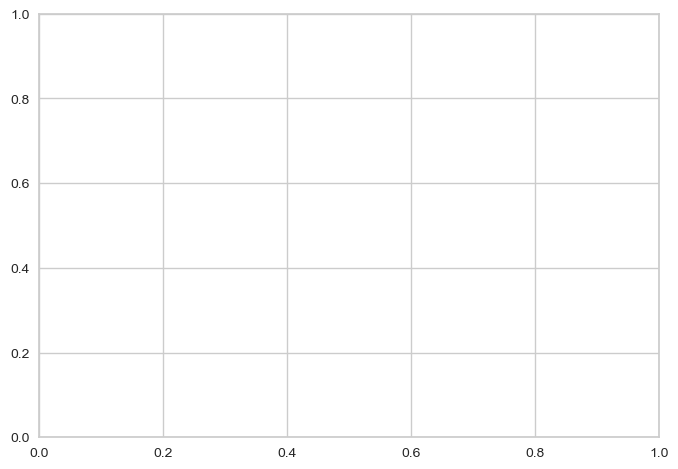

In [34]:
plt.plot(range(100, 3001, 100), resultados_forest)
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.title("Otimização do Número de Árvores")
resultados_forest[5]


O melhor resultado foi aquele obtido com 2500 árvores (90,25%) e portanto esse foi o número de árvores escolhido.

* Número mínimo de amostras nas folhas:

In [41]:
resultados_forest = []

for i in [1] + list(range(2, 11, 2)):
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)

    random_forest = RandomForestClassifier(n_estimators=600, min_samples_leaf=i, n_jobs=-1, random_state=i) # criação do modelo de Random Forest
    scores = cross_val_score(random_forest, features, labels, cv=kfold) # treinamento do modelo de Random Forest
    resultados_forest.append(scores.mean()) # avaliação do modelo de Random Forest

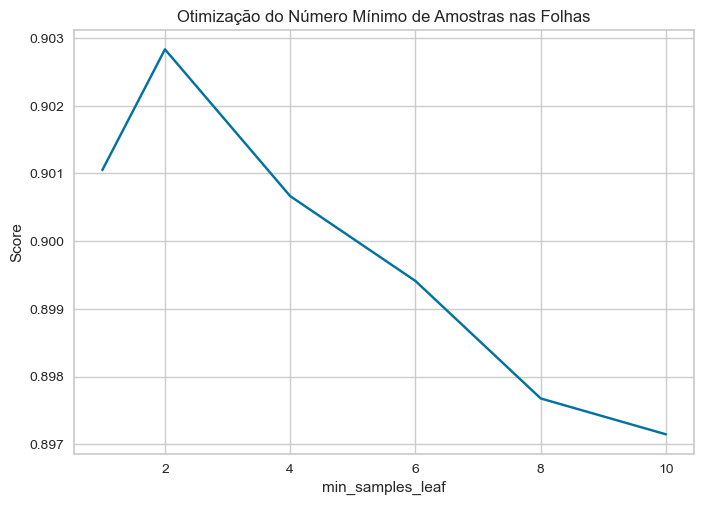

In [44]:
plt.plot([1] + list(range(2, 11, 2)), resultados_forest)
plt.xlabel("min_samples_leaf")
plt.ylabel("Score")
plt.title("Otimização do Número Mínimo de Amostras nas Folhas");

* Número máximo de features no split:

In [36]:
resultados_forest_n = []
resultados_forest_sqrt = []
resultados_forest_log2 = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    random_forest = RandomForestClassifier(n_estimators=600, min_samples_leaf=2, n_jobs=-1, random_state=i) # criação do modelo de Random Forest com n features 
    scores = cross_val_score(random_forest, features, labels, cv=kfold) # treinamento do modelo de Random Forest com n features 
    resultados_forest_n.append(scores.mean()) # avaliação do modelo de Random Forest com n features 

    random_forest = RandomForestClassifier(n_estimators=600, min_samples_leaf=2, max_features='sqrt', n_jobs=-1, random_state=i) # criação do modelo de Random Forest com sqrt(n) features
    scores = cross_val_score(random_forest, features, labels, cv=kfold) # treinamento do modelo de Random Forest com sqrt(n) features
    resultados_forest_sqrt.append(scores.mean()) # avaliação do modelo de Random Forest com sqrt(n) features

    random_forest = RandomForestClassifier(n_estimators=600, min_samples_leaf=2, max_features='log2', n_jobs=-1, random_state=i) # criação do modelo de Random Forest com log2(n) features
    scores = cross_val_score(random_forest, features, labels, cv=kfold) # treinamento do modelo de Random Forest com log2(n) features
    resultados_forest_log2.append(scores.mean()) # avaliação do modelo de Random Forest com log2(n) features

In [40]:
print(f"Usando todas as n features temos média {np.mean(resultados_forest_n)} e desvio padrão {np.std(resultados_forest_n)}")
print(f"Usando sqrt(n) features temos média {np.mean(resultados_forest_sqrt)} e desvio padrão {np.std(resultados_forest_sqrt)}")
print(f"Usando log2(n) features temos média {np.mean(resultados_forest_log2)} e desvio padrão {np.std(resultados_forest_log2)}")

Usando todas as n features temos média 0.9014276164387803 e desvio padrão 0.0005675580581768553
Usando sqrt(n) features temos média 0.9014276164387803 e desvio padrão 0.0005675580581768553
Usando log2(n) features temos média 0.9014231339229752 e desvio padrão 0.0005677302028967802


## Comparação do Modelo Random Forest selecionado com Naïve Bayes

In [3]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, stratify = labels)
    
naive_bayes = GaussianNB() # criação do modelo Naive Bayes
naive_bayes.fit(x_train,y_train) # treinamento do modelo Naive Bayes
y_predict_naive_bayes = naive_bayes.predict(x_test) # classificação com o modelo Naive Bayes
resultado_naive_bayes = accuracy_score(y_test, y_predict_naive_bayes) # percentual de acerto do modelo Naive Beyes

random_forest = RandomForestClassifier(n_estimators=600, min_samples_leaf=2, n_jobs=-1) # criação do modelo de Random Forest
random_forest.fit(x_train,y_train) # treinamento do modelo de Random Forest
y_predict_forest = random_forest.predict(x_test) # classificação com o modelo Random Forest
resultado_forest = accuracy_score(y_test, y_predict_forest) # percentual de acerto do modelo Random Forest

print(f"A acurácia do Naïve Beyes foi de {resultado_naive_bayes}")
print(f"A acurácia do Random Forest foi de {resultado_forest}")

A acurácia do Naïve Beyes foi de 0.6628131021194605
A acurácia do Random Forest foi de 0.898121387283237


### Avaliação dos resultados:

A acurácia do Naïve Beyes foi de 0.6628131021194605


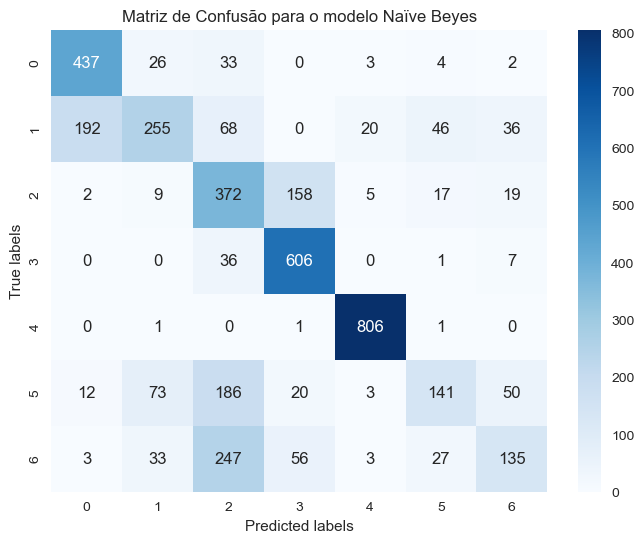

A acurácia do Random Forest foi de 0.898121387283237


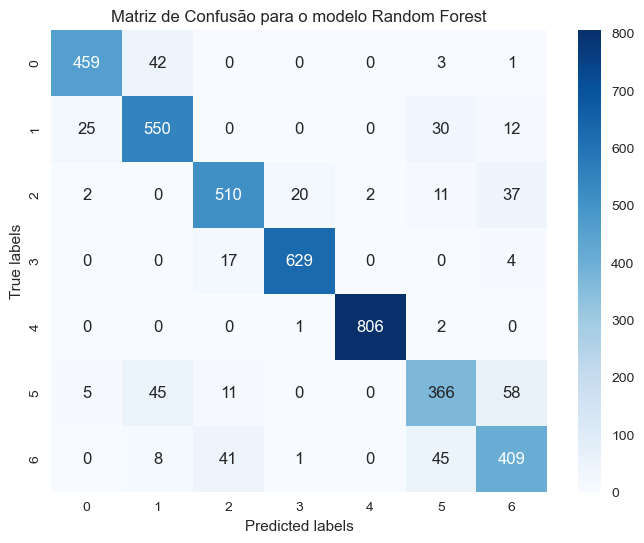

In [5]:
# TODO recuperar os labels categóricos

# Naive Beyes
print(f"A acurácia do Naïve Beyes foi de {resultado_naive_bayes}")
cm = confusion_matrix(y_test, y_predict_naive_bayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusão para o modelo Naïve Beyes')
plt.show()

# Random Forest
print(f"A acurácia do Random Forest foi de {resultado_forest}")
cm = confusion_matrix(y_test, y_predict_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusão para o modelo Random Forest')
plt.show()


## Classificação do dataset de teste

### Treinamento e Classificação

In [6]:
random_forest = RandomForestClassifier(n_estimators=600, min_samples_leaf=2, n_jobs=-1) # criação do modelo de Random Forest
random_forest.fit(features,labels) # treinamento do modelo de Random Forest com o dataset de treinamento completo
y_predict_forest = random_forest.predict(test) # classificação com o modelo Random Forest

In [11]:
resultado = np.column_stack((test_dataset['id'].values, y_predict_forest))
print(resultado)

[[20758     3]
 [20759     5]
 [20760     4]
 ...
 [34595     0]
 [34596     1]
 [34597     3]]


### Geração do CSV